In [1]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from time import time

In [2]:
url = "D:\\TUGAS AKHIR\\Data TA\\Australian fraud dataset\\australian.csv"
colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']

data = pd.read_csv(url, header = None, names = colnames)
data["y"].value_counts()

0    383
1    307
Name: y, dtype: int64

In [3]:
X = data.drop('y', axis = 1)
X = (X-X.mean())/X.std()
y = data['y']

In [4]:
#################### I N P U T ####################
c1 = 0.9
c2 = 0.5
wmax = 0.9
wmin = 0.4
w = wmax

n_iterations = 10
n_particles = 100

In [5]:
#mencari nilai 0-1 loss dari tiap partikel
#partikle = (gamma,C) untuk rbf
def fitness_function(position):
    kf = KFold(n_splits = 3)
    svclassifier = SVC(kernel='poly', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    scores = cross_val_score(svclassifier, X, y, cv = kf, scoring = 'roc_auc')
    return np.mean(scores)
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.3)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([1,9,-1,11])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

for i in range(n_particles):
    max_velocity = np.array([2,10])
    min_velocity = np.array([-2,-10])
    max_position = np.array([8,10])
    min_position = np.array([2, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [6]:
particle_position_vector = np.array([np.array([random.randint(2,8), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
gbest_fitness_value = np.array([0])
gbest_position = np.array([float('inf'), float('inf')])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.randint(1,2),(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
#velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


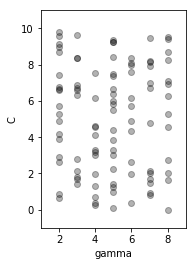

AUC for particle - 1 is 0.8102372480437413  At (gamma, c):  [8.         1.62843823] .. Time =  0.4040050506591797
AUC for particle - 2 is 0.8102372480437413  At (gamma, c):  [6.         4.32965767] .. Time =  0.5180082321166992
AUC for particle - 3 is 0.8129547083612017  At (gamma, c):  [2.         6.58165906] .. Time =  0.1510007381439209
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         1.47555271] .. Time =  0.4829847812652588
AUC for particle - 5 is 0.8102118512183444  At (gamma, c):  [7.         2.01296835] .. Time =  0.4780082702636719
AUC for particle - 6 is 0.8102118512183444  At (gamma, c):  [7.        4.7643526] .. Time =  0.4539952278137207
AUC for particle - 7 is 0.8102118512183444  At (gamma, c):  [7.         6.99649084] .. Time =  0.4950108528137207
AUC for particle - 8 is 0.8102118512183444  At (gamma, c):  [7.         0.78964545] .. Time =  0.48499226570129395
AUC for particle - 9 is 0.8102372480437413  At (gamma, c):  [4.         3.20324262] .. Ti

AUC for particle - 73 is 0.8103134385199318  At (gamma, c):  [5.         6.39927034] .. Time =  0.46998071670532227
AUC for particle - 74 is 0.8102372480437413  At (gamma, c):  [8.        8.2725044] .. Time =  0.4669952392578125
AUC for particle - 75 is 0.8177547083612016  At (gamma, c):  [5.         0.08593069] .. Time =  0.16699934005737305
AUC for particle - 76 is 0.8121420099485032  At (gamma, c):  [2.         3.91810642] .. Time =  0.1905224323272705
AUC for particle - 77 is 0.8140467718532651  At (gamma, c):  [3.         1.39791088] .. Time =  0.218001127243042
AUC for particle - 78 is 0.8102372480437413  At (gamma, c):  [4.         7.53888542] .. Time =  0.5189962387084961
AUC for particle - 79 is 0.8102118512183444  At (gamma, c):  [7.         8.17489874] .. Time =  0.43802547454833984
AUC for particle - 80 is 0.8128785178850112  At (gamma, c):  [2.         6.64902853] .. Time =  0.15798544883728027
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [8.         4.5617

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.8102372480437413  At (gamma, c):  [3.         8.36263654] .. Time =  0.4879953861236572
The best position in iteration number 1 is [8.0000000e+00 2.6004519e-03] with AUC: 0.8267244659349656
39.123831272125244


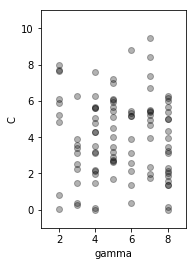

AUC for particle - 1 is 0.8102372480437413  At (gamma, c):  [6.         3.14535558] .. Time =  0.47901058197021484
AUC for particle - 2 is 0.8102372480437413  At (gamma, c):  [8.         1.38305801] .. Time =  0.4340081214904785
AUC for particle - 3 is 0.8102372480437413  At (gamma, c):  [4.         4.27126899] .. Time =  0.4129972457885742
AUC for particle - 4 is 0.8102372480437413  At (gamma, c):  [8.         1.57650191] .. Time =  0.4284932613372803
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         1.37074796] .. Time =  0.4089961051940918
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         5.39994278] .. Time =  0.39599156379699707
AUC for particle - 7 is 0.8102372480437413  At (gamma, c):  [8.         5.02264101] .. Time =  0.41000866889953613
AUC for particle - 8 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.1080162525177002
AUC for particle - 9 is 0.8103134385199318  At (gamma, c):  [5.         1.70190521] .. Time =

AUC for particle - 73 is 0.8102118512183444  At (gamma, c):  [7.         5.39740004] .. Time =  0.465038537979126
AUC for particle - 74 is 0.8102118512183444  At (gamma, c):  [7.         4.66848528] .. Time =  0.4609956741333008
AUC for particle - 75 is 0.8102372480437413  At (gamma, c):  [4.         2.11779749] .. Time =  0.408994197845459
AUC for particle - 76 is 0.814072168678662  At (gamma, c):  [2.         5.24391728] .. Time =  0.1400134563446045
AUC for particle - 77 is 0.833476009926574  At (gamma, c):  [2.         0.01965128] .. Time =  0.10899734497070312
AUC for particle - 78 is 0.8103134385199318  At (gamma, c):  [5.         6.03456347] .. Time =  0.47400474548339844
AUC for particle - 79 is 0.8102372480437413  At (gamma, c):  [6.         8.83247029] .. Time =  0.47599148750305176
AUC for particle - 80 is 0.8143261369326301  At (gamma, c):  [2.        4.8560052] .. Time =  0.1289968490600586
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [8.         4.33492189

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.8103134385199318  At (gamma, c):  [5.         5.69421502] .. Time =  0.4949910640716553
The best position in iteration number 2 is [4.e+00 1.e-03] with AUC: 0.8431769539744672
39.405046701431274


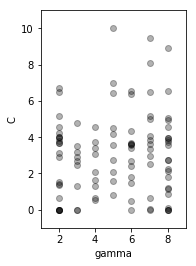

AUC for particle - 1 is 0.8102372480437413  At (gamma, c):  [4.         4.58124884] .. Time =  0.42698121070861816
AUC for particle - 2 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.10499715805053711
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         4.16661059] .. Time =  0.4779973030090332
AUC for particle - 4 is 0.8102372480437413  At (gamma, c):  [8.        2.2206612] .. Time =  0.40499234199523926
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         1.19307173] .. Time =  0.41001129150390625
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         6.57721812] .. Time =  0.41799259185791016
AUC for particle - 7 is 0.8102372480437413  At (gamma, c):  [8.         1.14685968] .. Time =  0.4129974842071533
AUC for particle - 8 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.10201048851013184
AUC for particle - 9 is 0.8107705813770746  At (gamma, c):  [4.         1.27990459] .. Time =  0.189

AUC for particle - 73 is 0.8102372480437413  At (gamma, c):  [8.         5.05901864] .. Time =  0.6171343326568604
AUC for particle - 74 is 0.8103134385199318  At (gamma, c):  [5.         1.58542248] .. Time =  0.4691643714904785
AUC for particle - 75 is 0.8105928035992968  At (gamma, c):  [3.         3.18442902] .. Time =  0.20098209381103516
AUC for particle - 76 is 0.8135388353453287  At (gamma, c):  [2.         4.54106216] .. Time =  0.15999817848205566
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.09299969673156738
AUC for particle - 78 is 0.8102372480437413  At (gamma, c):  [6.         3.69044785] .. Time =  0.504070520401001
AUC for particle - 79 is 0.8103134385199318  At (gamma, c):  [ 5. 10.] .. Time =  0.6330153942108154
AUC for particle - 80 is 0.8122182004246937  At (gamma, c):  [2.         3.95055741] .. Time =  0.13399696350097656
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [8.         3.96253388] .. Time =  0.4

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.8102118512183444  At (gamma, c):  [7.         3.84007318] .. Time =  0.5239932537078857
The best position in iteration number 3 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
35.2372670173645


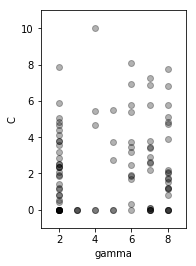

AUC for particle - 1 is 0.8142753432818365  At (gamma, c):  [2.         5.04618912] .. Time =  0.13599634170532227
AUC for particle - 2 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.1119992733001709
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         3.72468145] .. Time =  0.46401071548461914
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         2.21096942] .. Time =  0.43300724029541016
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         1.19704608] .. Time =  0.3909945487976074
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         7.76604258] .. Time =  0.37297964096069336
AUC for particle - 7 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.09197831153869629
AUC for particle - 8 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.09501862525939941
AUC for particle - 9 is 0.8196340734405667  At (gamma, c):  [2.         0.51649568] .. Time =  0.105998516

AUC for particle - 75 is 0.8119896289961223  At (gamma, c):  [2.         3.79288653] .. Time =  0.1139981746673584
AUC for particle - 76 is 0.8128531210596143  At (gamma, c):  [2.         4.39421276] .. Time =  0.15396523475646973
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.11299681663513184
AUC for particle - 78 is 0.8102372480437413  At (gamma, c):  [6.         1.92332153] .. Time =  0.6980071067810059
AUC for particle - 79 is 0.8102372480437413  At (gamma, c):  [ 4. 10.] .. Time =  0.4489922523498535
AUC for particle - 80 is 0.8153166131231063  At (gamma, c):  [2.         1.87857618] .. Time =  0.14598321914672852
AUC for particle - 81 is 0.8102118512183444  At (gamma, c):  [7.         2.58383949] .. Time =  0.45500946044921875
AUC for particle - 82 is 0.8102372480437413  At (gamma, c):  [8.        0.8014786] .. Time =  0.42499351501464844
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.142997026

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AUC for particle - 100 is 0.8102372480437413  At (gamma, c):  [8.         2.21523514] .. Time =  0.43099141120910645
The best position in iteration number 4 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
30.52160882949829


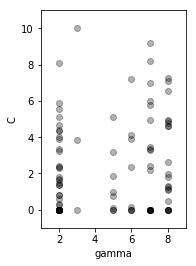

AUC for particle - 1 is 0.8135134385199317  At (gamma, c):  [2.         5.86027534] .. Time =  0.15299725532531738
AUC for particle - 2 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.09202194213867188
AUC for particle - 3 is 0.8102372480437413  At (gamma, c):  [6.         3.91519252] .. Time =  0.5890140533447266
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         2.38408509] .. Time =  0.5195777416229248
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         1.15779529] .. Time =  0.6145174503326416
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         6.56851846] .. Time =  0.6249923706054688
AUC for particle - 7 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.1869974136352539
AUC for particle - 8 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.18299508094787598
AUC for particle - 9 is 0.8258916102905972  At (gamma, c):  [2.         0.23778359] .. Time =  0.150994539260

AUC for particle - 75 is 0.8122435972500904  At (gamma, c):  [2.         4.03766142] .. Time =  0.16899752616882324
AUC for particle - 76 is 0.8136912162977095  At (gamma, c):  [2.         5.56458396] .. Time =  0.15099668502807617
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1209859848022461
AUC for particle - 78 is 0.8190245496310428  At (gamma, c):  [5.         0.06540457] .. Time =  0.12099361419677734
AUC for particle - 79 is 0.8102372480437413  At (gamma, c):  [ 3. 10.] .. Time =  0.45499300956726074
AUC for particle - 80 is 0.8243892678968893  At (gamma, c):  [2.         0.31915846] .. Time =  0.12198352813720703
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [8.         2.65255316] .. Time =  0.4770047664642334
AUC for particle - 82 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.11200380325317383
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.09996628761291

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


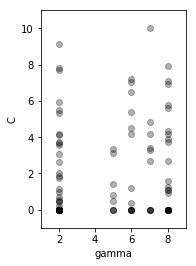

AUC for particle - 1 is 0.8118372480437412  At (gamma, c):  [2.         7.68263749] .. Time =  0.16199827194213867
AUC for particle - 2 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.1139974594116211
AUC for particle - 3 is 0.8102372480437413  At (gamma, c):  [6.         4.16240087] .. Time =  0.6359949111938477
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         2.68312772] .. Time =  0.6240618228912354
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         0.94754548] .. Time =  0.6139881610870361
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         6.95794076] .. Time =  0.49799299240112305
AUC for particle - 7 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.16898584365844727
AUC for particle - 8 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.1940007209777832
AUC for particle - 9 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1399986743927002
AUC f

AUC for particle - 75 is 0.8123959782024714  At (gamma, c):  [2.         4.12101342] .. Time =  0.22600197792053223
AUC for particle - 76 is 0.8139959782024714  At (gamma, c):  [2.         5.34152474] .. Time =  0.17001032829284668
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.12098002433776855
AUC for particle - 78 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.1349952220916748
AUC for particle - 79 is 0.811735660742154  At (gamma, c):  [2.         7.81657537] .. Time =  0.1909959316253662
AUC for particle - 80 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1080014705657959
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [8.         2.68395785] .. Time =  0.46999526023864746
AUC for particle - 82 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.16099882125854492
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1419990062713623
A

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 6 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
28.399181127548218


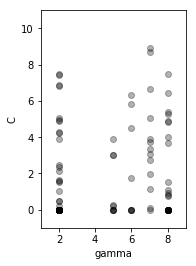

AUC for particle - 1 is 0.8119642321707254  At (gamma, c):  [2.         7.40948374] .. Time =  0.19498395919799805
AUC for particle - 2 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.11399602890014648
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         3.02811899] .. Time =  0.6190497875213623
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         2.71997565] .. Time =  0.5019934177398682
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [8.         0.83058921] .. Time =  0.4859929084777832
AUC for particle - 6 is 0.8102118512183444  At (gamma, c):  [7.         5.08268661] .. Time =  0.6079950332641602
AUC for particle - 7 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.12601113319396973
AUC for particle - 8 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.10451793670654297
AUC for particle - 9 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1049964427947998
AUC

AUC for particle - 75 is 0.8144785178850111  At (gamma, c):  [2.         4.90165135] .. Time =  0.14998579025268555
AUC for particle - 76 is 0.8142753432818365  At (gamma, c):  [2.         5.04281909] .. Time =  0.15700125694274902
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.10801315307617188
AUC for particle - 78 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.11200189590454102
AUC for particle - 79 is 0.8118626448691381  At (gamma, c):  [2.         7.49378094] .. Time =  0.1719977855682373
AUC for particle - 80 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.09805154800415039
AUC for particle - 81 is 0.8102118512183444  At (gamma, c):  [7.        1.9657959] .. Time =  0.4860055446624756
AUC for particle - 82 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.11296725273132324
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.09701251983642578


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 7 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
26.32001805305481


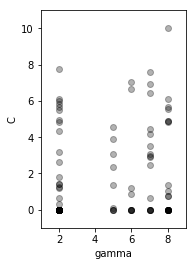

AUC for particle - 1 is 0.8135896289961222  At (gamma, c):  [2.         5.69026572] .. Time =  0.14698362350463867
AUC for particle - 2 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.11699891090393066
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         2.32935444] .. Time =  0.5444393157958984
AUC for particle - 4 is 0.8102118512183444  At (gamma, c):  [7.         3.07593668] .. Time =  0.5409939289093018
AUC for particle - 5 is 0.8102118512183444  At (gamma, c):  [7.         0.63731926] .. Time =  0.5799915790557861
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         4.88348678] .. Time =  0.46999597549438477
AUC for particle - 7 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.1049964427947998
AUC for particle - 8 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.10296750068664551
AUC for particle - 9 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.0949866771697998
AUC 

AUC for particle - 75 is 0.8142753432818365  At (gamma, c):  [2.         4.82457009] .. Time =  0.24999499320983887
AUC for particle - 76 is 0.8127007401072334  At (gamma, c):  [2.         4.31959485] .. Time =  0.1760087013244629
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.13396859169006348
AUC for particle - 78 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.1549968719482422
AUC for particle - 79 is 0.8135134385199317  At (gamma, c):  [2.         5.85529092] .. Time =  0.21399998664855957
AUC for particle - 80 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.11401081085205078
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [6.         1.21571933] .. Time =  0.6389923095703125
AUC for particle - 82 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.1139993667602539
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.13399910926818848


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 8 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
26.53329825401306


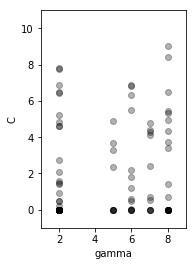

AUC for particle - 1 is 0.812599152805646  At (gamma, c):  [2.         6.88692436] .. Time =  0.18799471855163574
AUC for particle - 2 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.13899445533752441
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         2.36732742] .. Time =  0.6100058555603027
AUC for particle - 4 is 0.8102372480437413  At (gamma, c):  [8.        3.7111859] .. Time =  0.53298020362854
AUC for particle - 5 is 0.8102372480437413  At (gamma, c):  [6.         0.48790392] .. Time =  0.5779774188995361
AUC for particle - 6 is 0.8102118512183444  At (gamma, c):  [7.         4.12226772] .. Time =  0.548983097076416
AUC for particle - 7 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.13000273704528809
AUC for particle - 8 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.18101239204406738
AUC for particle - 9 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.12399458885192871
AUC for 

AUC for particle - 75 is 0.8140975655040587  At (gamma, c):  [2.         5.24775722] .. Time =  0.16299915313720703
AUC for particle - 76 is 0.8139451845516777  At (gamma, c):  [2.         4.62202069] .. Time =  0.16499781608581543
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.11798334121704102
AUC for particle - 78 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.11698436737060547
AUC for particle - 79 is 0.8138689940754872  At (gamma, c):  [2.         4.60517008] .. Time =  0.1590125560760498
AUC for particle - 80 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.12299585342407227
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [6.         1.20159929] .. Time =  0.5639936923980713
AUC for particle - 82 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.18199849128723145
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.1640017032623291

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The best position in iteration number 9 is [2.e+00 1.e-03] with AUC: 0.8652298952154353
27.857768058776855


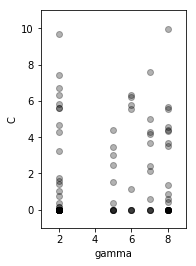

AUC for particle - 1 is 0.8136404226469159  At (gamma, c):  [2.         5.61165647] .. Time =  0.16901373863220215
AUC for particle - 2 is 0.8316078199182044  At (gamma, c):  [7.e+00 1.e-03] .. Time =  0.1340007781982422
AUC for particle - 3 is 0.8103134385199318  At (gamma, c):  [5.         2.44344926] .. Time =  0.5629956722259521
AUC for particle - 4 is 0.8102372480437413  At (gamma, c):  [8.        3.5235045] .. Time =  0.4689629077911377
AUC for particle - 5 is 0.8139705813770747  At (gamma, c):  [5.         0.34821772] .. Time =  0.17001032829284668
AUC for particle - 6 is 0.8102372480437413  At (gamma, c):  [8.         4.38482241] .. Time =  0.4619770050048828
AUC for particle - 7 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.11699604988098145
AUC for particle - 8 is 0.8346465094349966  At (gamma, c):  [5.e+00 1.e-03] .. Time =  0.12599658966064453
AUC for particle - 9 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.09999847412109375
AUC

AUC for particle - 75 is 0.8132340734405666  At (gamma, c):  [2.         6.34234482] .. Time =  0.23299431800842285
AUC for particle - 76 is 0.8136658194723126  At (gamma, c):  [2.         5.59922515] .. Time =  0.300595760345459
AUC for particle - 77 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.15196943283081055
AUC for particle - 78 is 0.832326416163211  At (gamma, c):  [6.e+00 1.e-03] .. Time =  0.2549922466278076
AUC for particle - 79 is 0.8139705813770747  At (gamma, c):  [2.         4.66878397] .. Time =  0.363994836807251
AUC for particle - 80 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.17799758911132812
AUC for particle - 81 is 0.8102372480437413  At (gamma, c):  [6.         1.13237017] .. Time =  0.8309872150421143
AUC for particle - 82 is 0.8274874934669548  At (gamma, c):  [8.e+00 1.e-03] .. Time =  0.20801091194152832
AUC for particle - 83 is 0.8652298952154353  At (gamma, c):  [2.e+00 1.e-03] .. Time =  0.16599392890930176
AUC

In [7]:
start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    start1 = time()
    plot(particle_position_vector)
    
    for i in range(n_particles):
        start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        stop2 = time()
        print("AUC for particle -", i+1,"is", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i], ".. Time = ", stop2 - start2)
        
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
    print("The best position in iteration number", iteration + 1, "is", gbest_position_cadidate, "with AUC:", fitness_function(gbest_position_cadidate))
    
   # if(gbest_fitness_value < gbest_fitness_value_cadidate):
    #    gbest_fitness_value = gbest_fitness_value_cadidate
     #   gbest_position = gbest_position_cadidate
    #print("The best position so far is ", gbest_position, "in iteration number", iteration + 1, "with AUC:", fitness_function(gbest_position))
    
    for i in range(n_particles):
        new_velocity = velocity_vector[i] + (c1*random.randint(0,3)) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i])
        new_velocity[0] = np.round(new_velocity[0])
        new_velocity = eval_velocity(new_velocity)
            
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    w = (wmax - wmin)*(n_iterations - iteration)/n_iterations + wmin
    iteration = iteration + 1
    stop1 = time()
    sec = stop1-start1
    print(sec)
stop = time()
print(stop - start)
